# Descriptive Statistics Review

## Before you start:

- Read the README.md file
- Comment as much as you can
- Happy learning!

## Context

![img](./diamonds.jpg)

In this lab we are going to work with data to understand the characteristics of a diamond that are most likely to influence its price. In this first part of the lab, we will explore and clean our data. 

The dataset we will be using is comprised of approximately 54k rows and 11 different columns. As always, a row represents a single observation (in this case a diamond) and each of the columns represent a different feature of a diamond.

The following codebook was provided together with the dataset to clarify what each column represents:


| Column  | Description  |
|---|---|
| Price  | Price in US dollars (326-18,823)  |
| Carat  | Weight of the diamond (0.2--5.01)  |
| Cut  | Quality of the cut (Fair, Good, Very Good, Premium, Ideal)  |
| Color  | Diamond colour, from J (worst) to D (best)  |
| Clarity  | A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))   |
| x  | Length in mm (0--10.74)  |
| y  | Width in mm (0--58.9)  |
| z  | Depth in mm (0--31.8)  |
| Depth  | Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)  |
| Table  | Width of top of diamond relative to widest point (43--95)  |

## Libraries
Pandas and numpy will be needed for the analysis of the data.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


First import the data from the .csv file provided and assign it to a variable named `diamonds` and **drop the column with the index.**

In [3]:
#your code here

#os.listdir()
diamonds = pd.read_csv("diamonds.csv", index_col = 0)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# 1. Taking the first look at the data.
Let's see how the data looks by using pandas methods like `head()`, `info()` and `describe()`. 

**First, use the `head` method.**

In [4]:
#your code here
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


We can see the first 5 rows of the dataset using the `head` method. This by itself doesn't tell us much about the data that we have, but we can have a first look at the features (columns) and some of the values that each one takes.

**What do you see? Make some comments about the values you see in each column, comparing them with the codebook. Is that what you would expect for these variables?**

In [5]:
#your code here
"""
In 'Price' I notice that there are in the low-end and rising (but it might just be 
coincidental, and not because it's sorted by price);

In 'Carat' I also notice that they're in the low end (but in this case they're definetly 
not sorted by this column).

In 'Cut' I see one Ideal, two Premium, and two good, which is interesting; at first glance
it seems that there will no no relation (or little relation?) between the cut and the price.

'Color': if I'm interpreting this corectly, 3 in the high-end, two in the low-end, so, 
probalby, no relation there either.

'Clarity' is a concept that is not well explained for me here (what does it mean to have
'worst clarity'? Does it mean that it is more opaque/less translucid?). In any case, going
from what I'm given, they seem to be in the low to mid end, so there may be some relation
here (judging solely from this very small sample, of course).

x, y and z: They seem to be on the low to mid range as well, so 1) there may be some 
relation there, and 2), it might be interesting to compute the areas and see if there's a
relation there. (maybe that's what depth is? It's not clear for me).

Depth: also seem to be in the low-mid range;

Table: also seem to be in the low-mid range.
"""

"\nIn 'Price' I notice that there are in the low-end and rising (but it might just be \ncoincidental, and not because it's sorted by price);\n\nIn 'Carat' I also notice that they're in the low end (but in this case they're definetly \nnot sorted by this column).\n\nIn 'Cut' I see one Ideal, two Premium, and two good, which is interesting; at first glance\nit seems that there will no no relation (or little relation?) between the cut and the price.\n\n'Color': if I'm interpreting this corectly, 3 in the high-end, two in the low-end, so, \nprobalby, no relation there either.\n\n'Clarity' is a concept that is not well explained for me here (what does it mean to have\n'worst clarity'? Does it mean that it is more opaque/less translucid?). In any case, going\nfrom what I'm given, they seem to be in the low to mid end, so there may be some relation\nhere (judging solely from this very small sample, of course).\n\nx, y and z: They seem to be on the low to mid range as well, so 1) there may be 

It is very important to know the amount of data we have, because everything will depend on that, from the quality of the analysis to the choice of our infrastracture.

**Check the shape of the data**

In [6]:
#your code here
diamonds.shape

(53940, 10)

The `clarity` column is confusing because we are not diamond experts. Let's modify this column with a new scale that is more understandable for us.

**Modify `clarity` column with numbers from 0 to 7. The lowest would be 0 with value `I1` and the greatest 7 with value `IF`**

In [7]:
#your code here
# Creating a dictionary to map the old values to the new values
clearer = {"I1": 0, 
           "SI2": 1, 
           "SI1": 2, 
           "VS2": 3, 
           "VS1": 4, 
           "VVS2": 5, 
           "VVS1": 6, 
           "IF": 7
          }

# replacing the old values for the new ones
# I thought I had to specify the column in which to do the replace, but apparently not..?
diamonds.replace(clearer, inplace = True)

# checking that everything's ok
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,1,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,2,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,4,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,3,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,1,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,2,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,2,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,2,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,1,61.0,58.0,2757,6.15,6.12,3.74


It makes sense to do the same with the `color` column.

**Do the same with values from 0 to 6. Read the codebook to see the match**

In [8]:
#your code here
# Creating a dictionary to map the old values to the new values
color = {"J": 0, 
           "I": 1, 
           "H": 2, 
           "G": 3, 
           "F": 4, 
           "E": 5, 
           "D": 6
          }

# replacing the old values for the new ones
diamonds.replace(color, inplace = True)

# checking that everything's ok
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,5,1,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,5,2,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,5,4,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,1,3,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,0,1,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,6,2,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,6,2,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,6,2,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,2,1,61.0,58.0,2757,6.15,6.12,3.74


With the `info` method, we can see the features of the dataset, and the amount of observations (rows) that have a non-null value and the types of the features. 

**Now use the `info` method and comparing with the shape, comment on what you see**

In [9]:
# Since the shape is of 53940 x 11 (we can also see here in RangeIndex and Data columns),
# it seems that there are no null-values in the dataset; in other words, There is no missing
# information.
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null int64
clarity    53940 non-null int64
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(3), object(1)
memory usage: 4.5+ MB


In the last line of the info output, you have some information about the types of the columns. As you know, it is a good idea to check if the types of each column is what you expect. If a column has the right type, we will be able to do all the operations that we want to do. 

For instance, if we have a column that is a `date` with a `string` format, we will have the data but we won't be able to do a simple operation, such as format the date the way that we would like.

Changing the data type to the one we needs can help us to solve a lot of problems in our data.

**Check the types of each column and comment if it matches with the expected**

In [10]:
#your code here

"""
After the changes in color and clarity it seems indeed that all columns are the expected
dtypes (unless it was meant to change not to ints but to strings of the ints.)
"""

'\nAfter the changes in color and clarity it seems indeed that all columns are the expected\ndtypes (unless it was meant to change not to ints but to strings of the ints.)\n'

# 2. A deeper look: checking the basic statistics.

The `describe` method gives us an overview of our data. From here we can see all the descriptive metrics for our variables.

**Use the `describe` method and comment on what you see**

In [11]:
#your code and comments here
"""
'cartat' seems to have very little dispersion, with the max of 5.01 seemingly being an 
outlier (min of .20, std of .47, 75% percentile at 1.04 and the max at 5.01). Worth 
investigation (at least plotting).

The "mins" in 'x', 'y' and 'z' are confusing (0) if they're spacial dimensions as I was 
understanding them. The Maxes are also quite weird (specially in 'y and a little but in 
'z').

There might be something in 'table' and/or 'price' in the same vein as above, but nothing 
stands out so much that I'd be confortable to say something about it just yet.
"""
diamonds.describe()

,carat,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,3.405803,3.051020,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.701105,1.647136,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,2.000000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,3.000000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,4.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


You have probably noticed that the columns x, y and z have a minimum value of 0. This means that there are one or more rows (or observations) in our dataset that are supposedly representing a diamond that has lenght, width or depth of 0. Considering that we're talking about a physical object, this is impossible!

Now let's proceed to check the rows that have a value of 0 in any of the x, y or z columns. By doing this we want to check if the data we are missing can be obtained using the data that we do have.

**Check the columns with `x`, `y` and `z` with value 0 in all of them and comment what you see**

In [12]:
#your code here
# any with value 0
missing_xyz = diamonds[(diamonds["x"] == 0) | (diamonds["y"] == 0) | (diamonds["z"] == 0)]

# checking the how many have a 0 value at least in x,y or z: (20)
missing_xyz.shape

# There's eight (8) 0's in the x column
missing_xyz.x.value_counts()

# There's seven (7) 0's in the y column
missing_xyz.y.value_counts()

# There's twenty (20) 0's in the x column
missing_xyz.z.value_counts()

# with value 0 in all of the columns: 7
len(diamonds[(diamonds["x"] == 0) & (diamonds["y"] == 0) & (diamonds["z"] == 0)])

# checking
missing_xyz#.shape

,carat,cut,color,clarity,depth,table,price,x,y,z
2208,1.00,Premium,3,1,59.1,59.0,3142,6.55,6.48,0.0
2315,1.01,Premium,2,0,58.1,59.0,3167,6.66,6.60,0.0
4792,1.10,Premium,3,1,63.0,59.0,3696,6.50,6.47,0.0
5472,1.01,Premium,4,1,59.2,58.0,3837,6.50,6.47,0.0
10168,1.50,Good,3,0,64.0,61.0,4731,7.15,7.04,0.0
11183,1.07,Ideal,4,1,61.6,56.0,4954,0.00,6.62,0.0
11964,1.00,Very Good,2,3,63.3,53.0,5139,0.00,0.00,0.0
13602,1.15,Ideal,3,3,59.2,56.0,5564,6.88,6.83,0.0
15952,1.14,Fair,3,4,57.5,67.0,6381,0.00,0.00,0.0
24395,2.18,Premium,2,1,59.4,61.0,12631,8.49,8.45,0.0


As you can see, we have 20 rows that have a value of 0 in some or all the aforementioned columns.
Most of them (12) are missing the z value, which we can obtain using the columns depth, x and y. 

20 rows with issues represent just 0.03% of our data (20 out of 53940) so it wouldn't be a big deal to remove them. Still, lets try to keep all the data we have. 

For those 12 rows, we will create a function that applies the formula given in the codebook and get the value of z.

**Create a function named `calculate_z` that applies the function in the codebook to one single row you give to the function**

In [13]:
#your code here
# getting the values where 'x' and 'y' are not 0, but z is.
the_twelve = (missing_xyz["x"] != 0) & (missing_xyz["y"] != 0) & (missing_xyz["z"] == 0)

# checking that I get the above mentioned 12
missing_xyz[the_twelve].shape

# creating the mask for the diamonds dataframe (for future use)
xy_to_z = (diamonds["x"] != 0) & (diamonds["y"] != 0) & (diamonds["z"] == 0)

# Note that it has len (or count) == 53 940, meaning that is covering the whole DF with False EXCEPT
# where the condition is met ('x' != 0 & 'y' != 0 & 'z' == 0); in other words, it's True
# for those entities (rows) where the value of 'z'== 0 and we have values for 'x' and for 
# 'y'.
xy_to_z.describe() # a really cool way to check the nature of the mask! (count - Freq == True)

count     53940
unique        2
top       False
freq      53928
dtype: object

In [14]:
"""
# creating a function to calculate the z
# So... I was thinking that by 'obs' I was passing the whole DF, but in fact I'm passing a
# Series. Then filtering it with itself. In a way I'm undervaluing the power of the apply 
# method and doing part of its job for it. 
# Need to study these methods more. But it was a great learning experience.

def calculate_z(obs):
    
    #Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
    
    #So... z = [(x + y) / 2] * (depth / 100)?
    
    
    if obs[obs["z"] == 0]:
        z = round(((obs["x"] + obs["y"]) / 2) * (obs["depth"] / 100), 2)
        return z
"""

# redesigning the function to calculate 'z' from the 'x', 'y' and depth values.
# I tried to think this through a different way, but found myself reverting back to this.
# This works, but, how could've I done better/differently?
def calculate_z(df):
    """
    Calculate 'z' from 'x', 'y' and 'depth', rounding to 2 decimals, and returning it
    IF 'z' == 0
    """
    if df[df["z"] == 0]:
        z = round(((df["x"] + df["y"]) / 2) * (df["depth"] / 100), 2)
        return z

**Apply it just to the rows with incorrect values**

In [15]:
#your code here
diamonds["z"] = diamonds.apply(calculate_z, axis = 1)

In [16]:
# checking if it worked
#diamonds[(diamonds["x"] == 0) | (diamonds["y"] == 0) | (diamonds["z"] == 0)]
#diamonds[xy_to_z]
diamonds.loc[2208]

carat            1
cut        Premium
color            3
clarity          1
depth         59.1
table           59
price         3142
x             6.55
y             6.48
z             3.85
Name: 2208, dtype: object

If we leave the other 8 values as they are, it would negatively affect our analysis, because these are data that do not make logical sense. Therefore it is better to consider those values as NaN values, since they are probably the result of a mistake or error during process of measuring and storing these values in a dataset.

To replace them we can use the pandas .replace() method and np.NaN.

**Replace the zero values in the `z` column for a NaN**

In [17]:
#your code here
# after speaking with the TA's, I realized that it wasn't only for the 'z' column, but also
# for the 'x' and why, so:
diamonds.replace({"z": {0: np.nan}, "y": {0: np.nan}, "x": {0: np.nan}}, inplace = True)

Let's check the data again with the `describe()` method.

In [18]:
#your code here
diamonds.describe()

,carat,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53932.000000,53933.000000,53933.000000
mean,0.797940,3.405803,3.051020,61.749405,57.457184,3932.799722,5.732007,5.735270,3.540027
std,0.474011,1.701105,1.647136,1.432621,2.234491,3989.439738,1.119670,1.140339,0.695607
min,0.200000,0.000000,0.000000,43.000000,43.000000,326.000000,3.730000,3.680000,2.040000
25%,0.400000,2.000000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,3.000000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,4.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,19.730000


The minimum value for x, y and z should now be a positive number, as it should be for the physical measurements of an object.

Let's finish by checking for NaN values in the data. Since we introduced them ourselves using 'replace', we will surely find some, but there may be more that are unrelated to the x, y and z columns. Checking NaNs is a fundamental part of data cleaning and it's always better to do this kind of operations before proceeding with analysis.

**Check how many NaNs do you have, comment what you would do with those values, and then do so**

In [19]:
#your code here
# I have 8 NaN's in the 'x' column, 7 in the 'y' column, and 7 in the 'z' column, for a 
# total of 22 NaN's.
# I'll start by looking at them to see if they have some communality, as well as with the 
# entities around them.
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          8
y          7
z          7
dtype: int64

In [20]:
# The 22 NaN's are in 8 entities, which is 3 in 7 (21), plus one in one (id == 11183)
round(diamonds[diamonds["x"].isnull()].describe(), 2)
diamonds[diamonds["x"].isnull()]

# confirming my assertion above
diamonds[diamonds.isnull().any(axis = 1)]

# checking the NaN's + the ones around them
save = list()
for i in range(len(diamonds)):
    if diamonds.loc[i + 1].isnull().any() == True:
        save += [diamonds.loc[i]]
        save += [diamonds.loc[i + 1]]
        save += [diamonds.loc[i + 2]]

save_df = pd.DataFrame(save, columns = diamonds.columns)


In [21]:
# I now think this was a bad idea. Maybe it would be interesting is something like a 
# timeseries, but here it makes no sense (I think). 

# Something else that could be done with more time (and/or other resources — ML —), would 
# be to derive those values from the carat, cut, color, clarity, depth, table in 
# relationship with the price. 

# In any case: I'll drop the entities (we're talking of 8 in more than 53K, so about 0.015%)
# where there's ANY NaN.
save_df

,carat,cut,color,clarity,depth,table,price,x,y,z
11182,1.34,Premium,3,1,60.1,61.0,4953,7.11,7.06,4.26
11183,1.07,Ideal,4,1,61.6,56.0,4954,NaN,6.62,2.04
11184,1.12,Ideal,3,1,62.2,55.0,4955,6.68,6.64,4.14
11963,1.01,Premium,3,2,62.3,59.0,5139,6.38,6.30,3.95
11964,1.00,Very Good,2,3,63.3,53.0,5139,NaN,NaN,NaN
11965,1.15,Premium,2,2,60.9,57.0,5139,6.80,6.72,4.12
15951,1.24,Ideal,1,2,60.6,59.0,6381,6.97,7.03,4.24
15952,1.14,Fair,3,4,57.5,67.0,6381,NaN,NaN,NaN
15953,1.00,Very Good,4,3,63.3,55.0,6382,6.34,6.29,4.00
24520,1.54,Premium,3,3,60.9,59.0,12800,7.49,7.45,4.55


In [22]:
# Sorry; I was just curious
save_df.corr()

# After seeing this, I think we could fill the 'x', 'y' and 'z' missing values using the 
# correlation coefficients 'carat' with those columns to get very good estimations. That 
# said, I'll proceed has planned (as if I hadn't seen this).
diamonds.corr()

,carat,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.291437,-0.352841,0.028224,0.181618,0.921591,0.977765,0.953989,0.971730
color,-0.291437,1.000000,-0.025631,-0.047279,-0.026465,-0.172511,-0.270780,-0.264018,-0.273600
clarity,-0.352841,-0.025631,1.000000,-0.067384,-0.160327,-0.146800,-0.373009,-0.359168,-0.374570
depth,0.028224,-0.047279,-0.067384,1.000000,-0.295779,-0.010647,-0.025097,-0.029142,0.096662
table,0.181618,-0.026465,-0.160327,-0.295779,1.000000,0.127134,0.196130,0.184519,0.154654
price,0.921591,-0.172511,-0.146800,-0.010647,0.127134,1.000000,0.887227,0.867870,0.877853
x,0.977765,-0.270780,-0.373009,-0.025097,0.196130,0.887227,1.000000,0.974933,0.986392
y,0.953989,-0.264018,-0.359168,-0.029142,0.184519,0.867870,0.974933,1.000000,0.985152
z,0.971730,-0.273600,-0.374570,0.096662,0.154654,0.877853,0.986392,0.985152,1.000000


In [23]:
# dropping the rows that have ANY null values in them:
diamonds.dropna(inplace = True)

# checking the result:
diamonds.isnull().sum()

# checking that I dropped 8 entities from the +53K
# 53940 - 53932 == 8, so it should be good.
diamonds.shape

(53932, 10)

# 3. Checking for outliers
Now we are going to revisit the summary table to check for outliers.

**Use the `describe` method again and comment on what you see. After that, check if you have any outliers** 

In [24]:
#your code here
diamonds.describe()

,carat,color,clarity,depth,table,price,x,y,z
count,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000
mean,0.797879,3.405789,3.051101,61.749336,57.457029,3932.136079,5.732007,5.735254,3.540055
std,0.473986,1.701165,1.647109,1.432514,2.234064,3988.734835,1.119670,1.140343,0.695583
min,0.200000,0.000000,0.000000,43.000000,43.000000,326.000000,3.730000,3.680000,2.240000
25%,0.400000,2.000000,2.000000,61.000000,56.000000,949.750000,4.710000,4.720000,2.910000
50%,0.700000,3.000000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,4.000000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,19.730000


In [25]:
#your comments here
"""
As I said before:
'cartat' seems to have very little dispersion, with the max of 5.01 seemingly being an 
outlier (min of .20, std of .47, 75% percentile at 1.04 and the max at 5.01). Worth 
investigation (at least plotting).

'color' doesn't seem to have outliers (the distribution and quartiles seem to be neatly 
arranged);

'clarity' might have something — the values seem to be compacted just bellow the 50% 
percentile, but the max and min seem to escape it somewhat;

'depth' seems OK, but when plotting we might notice something there;

'table' will show outliers (almost) for sure (the difference between the 75% and the max is
huge, and there's some difference between the min and the 25%);

'price' seems to be all over the place (again, the difference between the 75% and the max is
huge);

'x', 'y' and 'z': specially the 'y'is a bit... 'unusual' in the max, but the others seem 
that will show some outliers as well.
"""

"\nAs I said before:\n'cartat' seems to have very little dispersion, with the max of 5.01 seemingly being an \noutlier (min of .20, std of .47, 75% percentile at 1.04 and the max at 5.01). Worth \ninvestigation (at least plotting).\n\n'color' doesn't seem to have outliers (the distribution and quartiles seem to be neatly \narranged);\n\n'clarity' might have something — the values seem to be compacted just bellow the 50% \npercentile, but the max and min seem to escape it somewhat;\n\n'depth' seems OK, but when plotting we might notice something there;\n\n'table' will show outliers (almost) for sure (the difference between the 75% and the max is\nhuge, and there's some difference between the min and the 25%);\n\n'price' seems to be all over the place (again, the difference between the 75% and the max is\nhuge);\n\n'x', 'y' and 'z': specially the 'y'is a bit... 'unusual' in the max, but the others seem \nthat will show some outliers as well.\n"

To manage these outliers, we are going to filter our DataFrame, we're going to take all the values that have a price higher than the 75th percentile.

**Look for that quantile and filter the dataframe to clearly see the outliers. What do you think?**

In [26]:
#your code here
# checking the values above the 75th percentile
diamonds["price"].quantile(q = [0.75, 1.00])

# creating a mask with the values above the 75th percentile
high_price = diamonds["price"] > 5324

# Checking the mask properties (53 932 - 40451 = 13 481), so there's 13 481 entities with
# values higher than the 75th percentile, or aprox. 25% of the dataset.
high_price.describe()

# Creating a DataFrame with only the 'prices' above the 75th percentile.
diamonds[high_price]

,carat,cut,color,clarity,depth,table,price,x,y,z
12766,1.07,Ideal,5,1,62.2,55.0,5325,6.54,6.58,4.08
12767,1.11,Ideal,2,2,60.6,59.0,5325,6.75,6.71,4.08
12768,1.14,Premium,3,2,62.2,58.0,5326,6.64,6.70,4.15
12769,1.07,Premium,2,3,62.1,59.0,5327,6.52,6.56,4.06
12770,1.33,Very Good,0,2,64.0,53.0,5327,6.93,7.01,4.46
...,...,...,...,...,...,...,...,...,...,...
27746,2.00,Very Good,2,2,62.8,57.0,18803,7.95,8.00,5.01
27747,2.07,Ideal,3,1,62.5,55.0,18804,8.20,8.13,5.10
27748,1.51,Ideal,3,7,61.7,55.0,18806,7.37,7.41,4.56
27749,2.00,Very Good,3,2,63.5,56.0,18818,7.90,7.97,5.04


Our dataset is really big and the outliers are really far apart from the rest of the values. To see this more clearly we will use a boxplot, which plots the median, 25th and 75th quartile, the maximum and minimum, as well as any outliers.

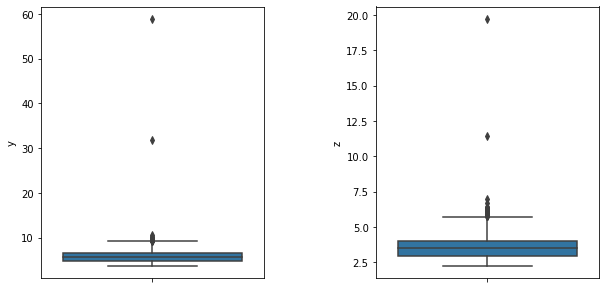

In [27]:
#Run this code
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

Now we can see that all the values are within an acceptable range, but we have 2 big outliers in y and 1 in z. Now we know that our max values for y should be around 10 and the values for z should be around 6, so let's filter our dataset to find values for z higher than 10 in it.


In [28]:
#your code here
"""
I must've done or interpreted something wrong, for I disagree with the observation above; 
I'm getting 2 big outliers in 'y' (yes), and also 2 big outliers in 'z' (not one).

Either way, I'll follow the instructions as is.
"""
# creating a mask to filter values in 'z' higher than 10
z_10higher = diamonds["z"] > 10

diamonds[z_10higher]

,carat,cut,color,clarity,depth,table,price,x,y,z
24068,2.00,Premium,2,1,58.9,57.0,12210,8.09,58.9,19.73
49190,0.51,Ideal,5,4,61.8,55.0,2075,5.15,31.8,11.42


Now that we have found the outlier, let's use the function we defined earlier to correct this value. First, we need to change the value to 0 (because that's how we defined the function before) and then we will apply it.

**Apply `calculate_z` for the row with the outlier**

In [44]:
#your code here

# Changing the values of the 'z' outliers to 0
diamonds.loc[z_10higher, "z"] = 0

In [48]:
# checking that the values where changed correctly
diamonds[z_10higher]

# checking that I didn't change the remaining values in 'z' by mistake
diamonds.describe()

,carat,color,clarity,depth,table,price,x,y,z
count,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000
mean,0.797879,3.405789,3.051101,61.749336,57.457029,3932.136079,5.732007,5.735254,3.539478
std,0.473986,1.701165,1.647109,1.432514,2.234064,3988.734835,1.119670,1.140343,0.691584
min,0.200000,0.000000,0.000000,43.000000,43.000000,326.000000,3.730000,3.680000,0.000000
25%,0.400000,2.000000,2.000000,61.000000,56.000000,949.750000,4.710000,4.720000,2.910000
50%,0.700000,3.000000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,4.000000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,6.970000


In [49]:
# Applying the calculate_z function to the 'z' column again (to change those 0's)
diamonds["z"] = diamonds.apply(calculate_z, axis = 1)

In [50]:
# checking if it all seems ok (There are values in 'z' above 10 again??)
diamonds.describe()

,carat,color,clarity,depth,table,price,x,y,z
count,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000
mean,0.797879,3.405789,3.051101,61.749336,57.457029,3932.136079,5.732007,5.735254,3.540055
std,0.473986,1.701165,1.647109,1.432514,2.234064,3988.734835,1.119670,1.140343,0.695583
min,0.200000,0.000000,0.000000,43.000000,43.000000,326.000000,3.730000,3.680000,2.240000
25%,0.400000,2.000000,2.000000,61.000000,56.000000,949.750000,4.710000,4.720000,2.910000
50%,0.700000,3.000000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,4.000000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,19.730000


Let's check if we actually corrected the outlier.

In [54]:
# So this was corrected, but .loc[24068] went back to its previous value. Is the formula
# in calculate_z wrong? Where did I go wrong?
print(diamonds.loc[48410])
print(diamonds.loc[24068])

# .loc[49190] is also wrong?
diamonds[z_10higher]

carat           0.72
cut        Very Good
color              2
clarity            1
depth           62.9
table             57
price           1970
x               5.64
y               5.68
z               3.56
Name: 48410, dtype: object
carat            2
cut        Premium
color            2
clarity          1
depth         58.9
table           57
price        12210
x             8.09
y             58.9
z            19.73
Name: 24068, dtype: object


,carat,cut,color,clarity,depth,table,price,x,y,z
24068,2.00,Premium,2,1,58.9,57.0,12210,8.09,58.9,19.73
49190,0.51,Ideal,5,4,61.8,55.0,2075,5.15,31.8,11.42


Now let's do the same for `y`. First, let's filter the DataFrame to find the outliers. We said that the maximum values should be around 10, so let's check what are the values above 10.

**Check the values greater than 10 in the `y` column** 

In [55]:
#your code here
# creating a mask to filter values in 'y' higher than 10
y_10higher = diamonds["y"] > 10

# checking the values in 'y' higher than 10
diamonds[y_10higher]

,carat,cut,color,clarity,depth,table,price,x,y,z
24068,2.00,Premium,2,1,58.9,57.0,12210,8.09,58.90,19.73
25999,4.01,Premium,1,0,61.0,61.0,15223,10.14,10.10,6.17
27416,5.01,Fair,0,0,65.5,59.0,18018,10.74,10.54,6.97
27631,4.50,Fair,0,0,65.8,58.0,18531,10.23,10.16,6.71
49190,0.51,Ideal,5,4,61.8,55.0,2075,5.15,31.80,11.42


We can clearly see that the 31.8 in row 49189 is an outlier for the y value. Also, we can see that the 58.9 value for `y` in row 24067 is actually its depth, so it was a mistake when they introduced the data. Let's create a function to fix these outliers.

**Create a function named `calculate_y` to calculate `y` using `z` and `x` the same way you did above**

In [56]:
#your code here
def calculate_y(df):
    """
    Calculate 'y' from 'x', 'z' and 'depth', rounding to 2 decimals, and returning it
    IF 'y' == 0
    
    since: 
            z = ((x + y) / 2) * (depth / 100),
    then:
            y = ((200 z)/depth) - x
    
    (Used wolframalpha to rearange the equation:
    https://www.wolframalpha.com/widgets/view.jsp?id=4be4308d0f9d17d1da68eea39de9b2ce )
    """
    if df[df["y"] == 0]:
        y = round(((200 * df["z"]/ df["depth"]) - df["x"]), 2)
        
        return y

In [66]:
# changing the values in 'y' that are higher than 10 to 0
diamonds.loc[y_10higher, "y"] = 0

# checking
diamonds[y_10higher]

# rechecking
diamonds.describe()

,carat,color,clarity,depth,table,price,x,y,z
count,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000
mean,0.797879,3.405789,3.051101,61.749336,57.457029,3932.136079,5.732007,5.733039,3.540055
std,0.473986,1.701165,1.647109,1.432514,2.234064,3988.734835,1.119670,1.112410,0.695583
min,0.200000,0.000000,0.000000,43.000000,43.000000,326.000000,3.730000,0.000000,2.240000
25%,0.400000,2.000000,2.000000,61.000000,56.000000,949.750000,4.710000,4.720000,2.910000
50%,0.700000,3.000000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,4.000000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,9.950000,19.730000


In [61]:
# applying the calculate_y function
diamonds["y"] = diamonds.apply(calculate_y, axis = 1)

We will check the rows that had an outlier in `y`, to check that the values were changed.

**Check those rows and comment what you see**

In [65]:
#your thoughts here

# Now I'm pretty sure I'm either doing something wrong in my formula, or when applying the 
# mask, since I'm getting (almost) the same values back (and the difference, I think, is in
# the rounding). I don't think that's in the application of the mask, since they do seem to 
# change to 0. 

# I'm taking from this that not only my understanding of Statistics is lacking, but so is
# my understanding of Algebra. :/ Back to basics, I guess, to review my fundamentals. 
diamonds.describe()
diamonds[y_10higher]

,carat,cut,color,clarity,depth,table,price,x,y,z
24068,2.00,Premium,2,1,58.9,57.0,12210,8.09,58.90,19.73
25999,4.01,Premium,1,0,61.0,61.0,15223,10.14,10.09,6.17
27416,5.01,Fair,0,0,65.5,59.0,18018,10.74,10.54,6.97
27631,4.50,Fair,0,0,65.8,58.0,18531,10.23,10.17,6.71
49190,0.51,Ideal,5,4,61.8,55.0,2075,5.15,31.81,11.42


Now that we have corrected or dropped all of our outliers, lets plot another box plot to double check.

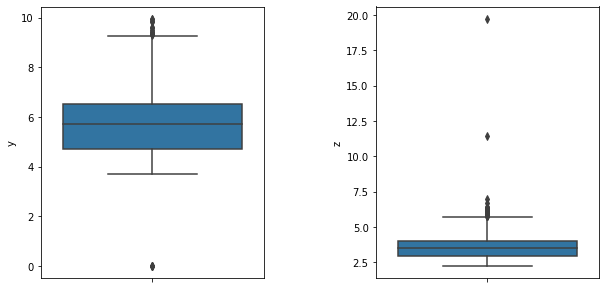

In [67]:
#Run this code
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

**What do you think? Are these values more reasonable?**


In [ ]:
#your thoughts here
"""
Wait, what? In 'y' yes (except for the '0' value outlier), and in 'z' it's better, there are
still some outliers higher than 10? Now I'm REALLY confused. ~:'( What's going on? I can't
understand. Please help and advise.
"""

**Once you are happy with your cleaning, save the cleaned data and continue to csv. Your new csv should be named ``diamonds_clean.csv``**

In [68]:
#your code here
diamonds.to_csv(r'diamonds_clean.csv')

In [69]:
# checking it's saved:
os.listdir()

['1.-Data Cleaning.ipynb',
 'diamonds.csv',
 'diamonds_clean.csv',
 '2.-EDA.ipynb',
 'README.md',
 '.gitignore',
 'diamonds.jpg',
 '.ipynb_checkpoints',
 '.git']

## IGRONE BELOW

In [ ]:
# Ignore this cell

# creating a new Series with the z 
#diamonds["new_z"] = diamonds.apply(calculate_z, axis = 1)
#diamonds[diamonds["z"] == 0]
#diamonds["z"] = diamonds.apply(calculate_z, axis = 1)
#diamonds[xy_to_z]
#diamonds

In [ ]:
# Ignore this cell

# Creating a function to check if the values in 'z' and the values in 'new_z' are the same
# within 2 decimal points (due to possible differences in rounding)

def difference(obs):
    diff = obs["new_z"] - obs["z"]

    if diff > 0.01 or diff < -0.01:
        return False
    else:
        return True

In [ ]:
# Ignore this cell

# Applying the function above; if I get a 'False', there will be at least one entry where
# the above computation returned a different value than what was in the 'z' column. This
# would mean that either the formula is wrong, that I understood the formula wrong, or that
# some piece of the data is wrong.
# diamonds.apply(difference, axis = 1).unique()

In [ ]:
# Ignore this cell

# Since I checked that there are indeed wrong values (and I read the exercise forwards), I'm
# assuming that I got the formula right, but that some values have been incorrectly 
# introduced. Therefore, I'm dropping the 'new_z' column:
#diamonds.drop("new_z", axis = 'columns', inplace = True)